#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [26]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10) #使得隨機數據可預測

# 資料準備

In [27]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [28]:
#確認 CIFAR10 Dataset 資料維度

print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [29]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [30]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [32]:
model = Sequential()

In [33]:
#卷積層1

In [34]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [35]:
model.add(Dropout(rate=0.25))

In [36]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [37]:
#卷積層2與池化層2

In [38]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [39]:
model.add(Dropout(0.25))

In [40]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [42]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [43]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [44]:
model.add(Dense(10, activation='softmax'))

In [45]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [46]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [85]:

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)
    


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 10s 263us/step - loss: 0.1825 - acc: 0.9285 - val_loss: 0.1932 - val_acc: 0.9238
Epoch 2/12
37500/37500 [==============================] - 9s 230us/step - loss: 0.1822 - acc: 0.9284 - val_loss: 0.1933 - val_acc: 0.9234
Epoch 3/12
37500/37500 [==============================] - 9s 231us/step - loss: 0.1819 - acc: 0.9289 - val_loss: 0.1922 - val_acc: 0.9240
Epoch 4/12
37500/37500 [==============================] - 9s 242us/step - loss: 0.1816 - acc: 0.9287 - val_loss: 0.1929 - val_acc: 0.9239
Epoch 5/12
37500/37500 [==============================] - 9s 246us/step - loss: 0.1812 - acc: 0.9292 - val_loss: 0.1921 - val_acc: 0.9240
Epoch 6/12
37500/37500 [==============================] - 9s 240us/step - loss: 0.1810 - acc: 0.9293 - val_loss: 0.1922 - val_acc: 0.9241
Epoch 7/12
37500/37500 [==============================] - 9s 231us/step - loss: 0.1808 - acc: 0.9291 - val_loss: 0.1914 -

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

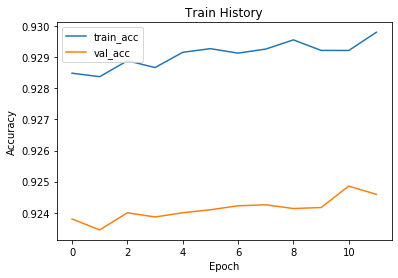

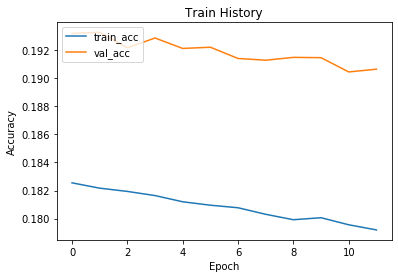

In [90]:
show_train_history('acc', 'val_acc')
show_train_history('loss', 'val_loss')

In [92]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('accuracy=', scores[1])

10000/10000 [==============================] - 2s 165us/step
accuracy= 0.924649974155426


In [93]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 10s 264us/step - loss: 0.0526 - acc: 0.6027 - val_loss: 0.0553 - val_acc: 0.6113
Epoch 2/12
37500/37500 [==============================] - 9s 232us/step - loss: 0.0524 - acc: 0.6054 - val_loss: 0.0553 - val_acc: 0.6130
Epoch 3/12
37500/37500 [==============================] - 9s 233us/step - loss: 0.0526 - acc: 0.6037 - val_loss: 0.0553 - val_acc: 0.6120
Epoch 4/12
37500/37500 [==============================] - 9s 231us/step - loss: 0.0524 - acc: 0.6059 - val_loss: 0.0552 - val_acc: 0.6120
Epoch 5/12
37500/37500 [==============================] - 9s 230us/step - loss: 0.0524 - acc: 0.6055 - val_loss: 0.0551 - val_acc: 0.6137
Epoch 6/12
37500/37500 [==============================] - 9s 231us/step - loss: 0.0522 - acc: 0.6059 - val_loss: 0.0552 - val_acc: 0.6128
Epoch 7/12
37500/37500 [==============================] - 9s 231us/step - loss: 0.0523 - acc: 0.6045 - val_loss: 0.0551 -

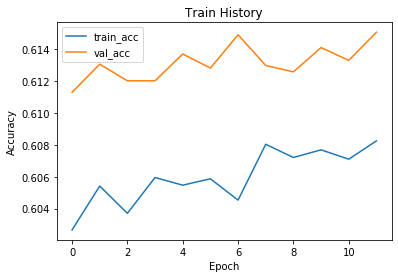

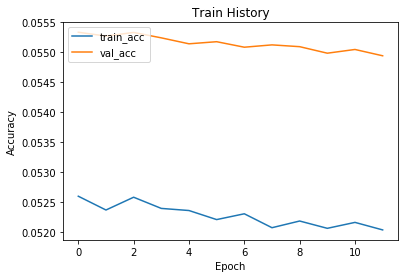

In [94]:
show_train_history('acc', 'val_acc')
show_train_history('loss', 'val_loss')

In [95]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('accuracy=', scores[1])

10000/10000 [==============================] - 2s 155us/step
accuracy= 0.6173
